In [58]:
''' 
Doing the exercises in Doing Data Science in Python instead of R
'''

# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install ggplot

import numpy as np 
from pandas import Timestamp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('nyt1.csv')
df.head()

# Get summary stats (similar to 'summary' command in R)
# info() is also useful
df.describe() 


,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB


In [4]:
age_group = [-float('inf'), 18, 24, 34, 44, 54, 64, float('inf')]
df['Age_Category'] = pd.cut(df['Age'], age_group)
df.head(10)

# An impression is the number of times an Ad is shown in front of a user
# Users need to see an Ad before they click on it...so no clicks are possible
# Without impressions! 

,Age,Gender,Impressions,Clicks,Signed_In,Age_Category
0,36,0,3,0,1,"(34.0, 44.0]"
1,73,1,3,0,1,"(64.0, inf]"
2,30,0,3,0,1,"(24.0, 34.0]"
3,49,1,3,0,1,"(44.0, 54.0]"
4,47,1,11,0,1,"(44.0, 54.0]"
5,47,0,11,1,1,"(44.0, 54.0]"
6,0,0,7,1,0,"(-inf, 18.0]"
7,46,0,5,0,1,"(44.0, 54.0]"
8,16,0,3,0,1,"(-inf, 18.0]"
9,52,0,4,0,1,"(44.0, 54.0]"


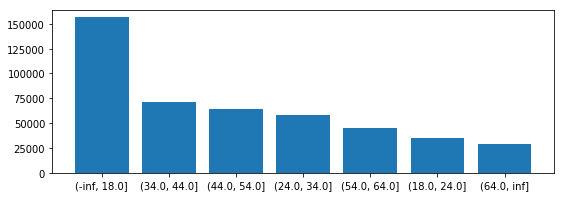

In [5]:
temp = df['Age_Category'].value_counts()
age_cats_df = pd.DataFrame({'age_cat': temp.index.astype('str'),'num':temp.values})

fig, ax = plt.subplots(figsize=(9,3))
ax.bar(age_cats_df['age_cat'], age_cats_df['num'])
plt.show()

In [19]:
df['ctr'] = df['Clicks']/df['Impressions']
df.head(10)

,Age,Gender,Impressions,Clicks,Signed_In,Age_Category,ctr
0,36,0,3,0,1,"(34.0, 44.0]",0.000000
1,73,1,3,0,1,"(64.0, inf]",0.000000
2,30,0,3,0,1,"(24.0, 34.0]",0.000000
3,49,1,3,0,1,"(44.0, 54.0]",0.000000
4,47,1,11,0,1,"(44.0, 54.0]",0.000000
5,47,0,11,1,1,"(44.0, 54.0]",0.090909
6,0,0,7,1,0,"(-inf, 18.0]",0.142857
7,46,0,5,0,1,"(44.0, 54.0]",0.000000
8,16,0,3,0,1,"(-inf, 18.0]",0.000000
9,52,0,4,0,1,"(44.0, 54.0]",0.000000


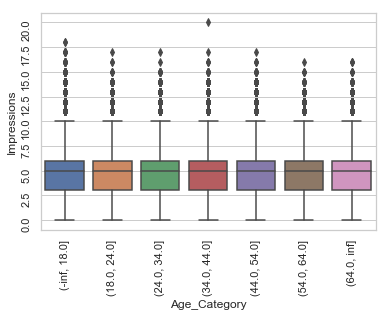

In [69]:
# Impressions and CTR per age group
# matplotlib doesn't have a good boxplot function... seaborn's is just like
# the boxplot function in R where you can specify x AND y!
ax = sns.boxplot(x=df['Age_Category'], y=df['Impressions'])
ax.tick_params(labelrotation=90)




In [47]:
df.groupby('Age_Category').max()

,Age,Gender,Impressions,Clicks,Signed_In,ctr
Age_Category,,,,,,
"(-inf, 18.0]",18,1,18,4,1,1.0
"(18.0, 24.0]",24,1,17,2,1,1.0
"(24.0, 34.0]",34,1,17,2,1,1.0
"(34.0, 44.0]",44,1,20,3,1,1.0
"(44.0, 54.0]",54,1,17,2,1,1.0
"(54.0, 64.0]",64,1,16,3,1,1.0
"(64.0, inf]",108,1,16,3,1,1.0
